بسم الله

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

In [16]:
df = pd.read_csv("/kaggle/input/top-100-youtube-channels-in-2024/YOUTUBE CHANNELS DATASET.csv")

df.head()

,Ranking,Username,Subscribers,Uploads,Views,Country
0,1.0,MrBeast,336M,838,"66,853,633,536",US
1,2.0,T-Series,281M,"22,313","277,242,795,553",IN
2,3.0,Cocomelon-Nursery Rhymes,186M,1370,"194,361,752,276",US
3,4.0,Youtube Movies,185M,0,0,NaN
4,5.0,Set India,180M,"148,727","172,709,029,653",IN


In [17]:
df.tail()

,Ranking,Username,Subscribers,Uploads,Views,Country
96,97.0,Voce Sabia,46M,"1,714","8,180,068,059",BR
97,98.0,Katy Perry,45.6M,170,"27,616,850,074",US
98,99.0,Speed Records,45.5M,"11,880","30,587,436,800",IN
99,100.0,Zhong,45.5M,"1,861","17,998,163,730",US
100,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.shape

(101, 6)

In [5]:
df.columns.to_list()

['Ranking', 'Username', 'Subscribers', 'Uploads', 'Views', 'Country']

In [6]:
df.columns.to_list()

['Ranking', 'Username', 'Subscribers', 'Uploads', 'Views', 'Country']

In [7]:
df.duplicated().sum()

0

In [8]:
df.isnull().sum()

Ranking        1
Username       1
Subscribers    1
Uploads        1
Views          1
Country        7
dtype: int64

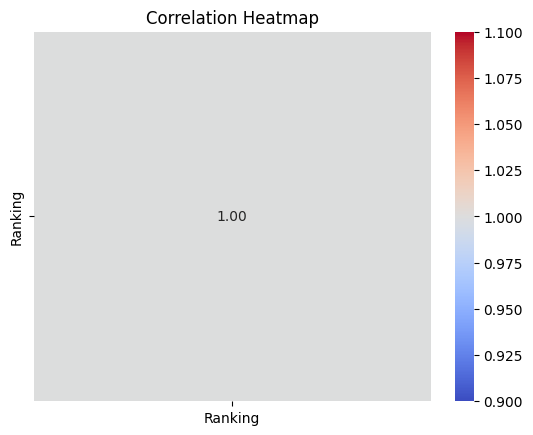

In [15]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Compute the correlation matrix
corr = numeric_df.corr()

# Plot the heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

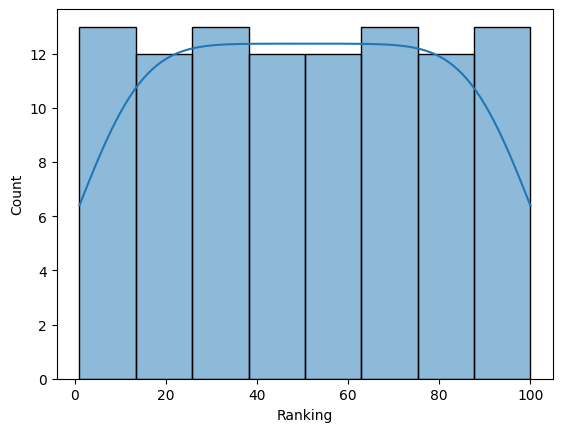

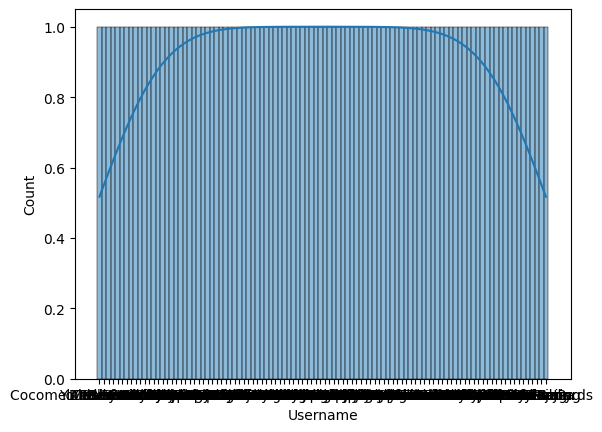

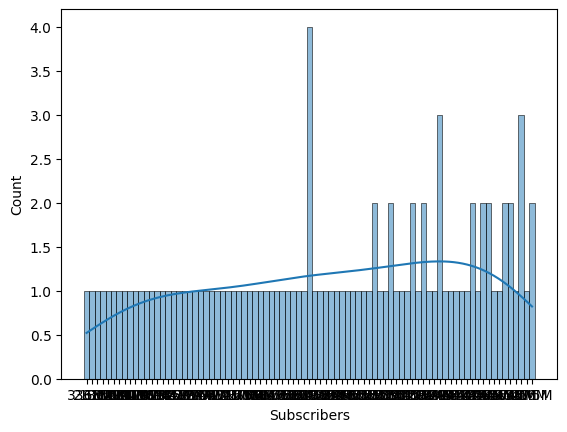

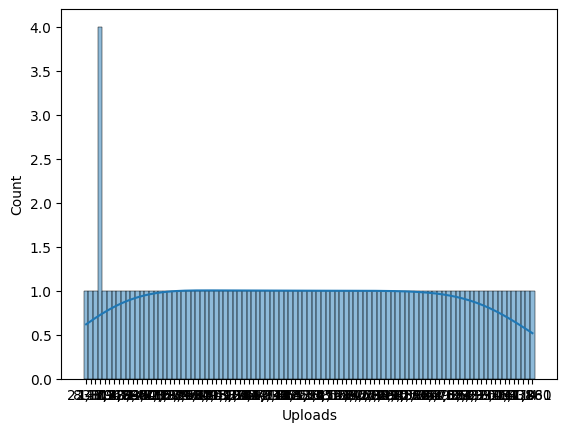

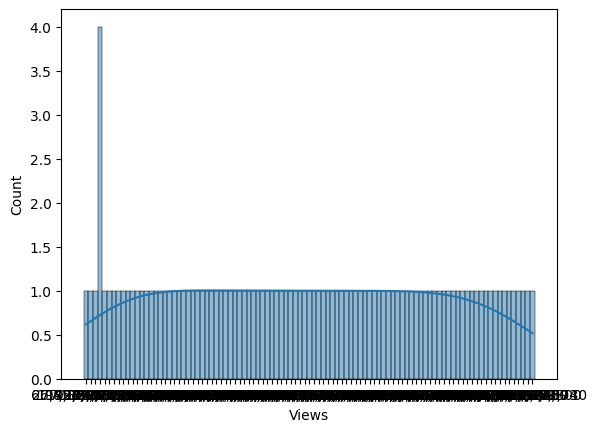

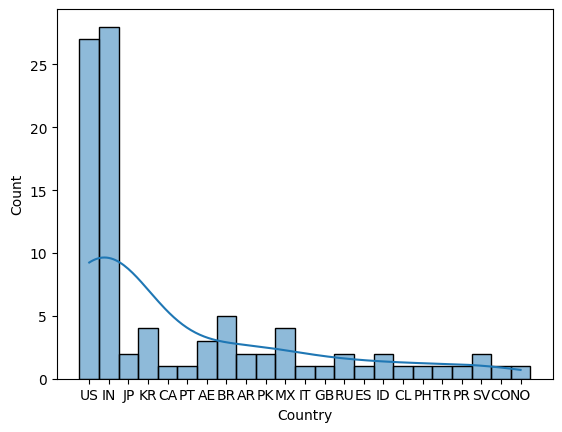

In [18]:
for col in df:
    sns.histplot(x=col,data=df,kde=True)
    plt.show()

In [19]:
columns =['Ranking', 'Username', 'Subscribers', 'Uploads', 'Views', 'Country']
# Iterate through each column and create a bar chart or histogram
for column in columns:
    try:
        if column not in df.columns:
            print(f"Column {column} does not exist in the DataFrame")
            continue
        
        # Check if the column is suitable for a bar chart (categorical data)
        if df[column].dtype == 'object' or df[column].dtype.name == 'category':
            # Count the occurrences of each unique value
            column_counts = df[column].value_counts().reset_index()
            column_counts.columns = [column, 'count']
            
            # Create a bar chart using plotly.express
            fig = px.bar(
                column_counts,
                x=column,
                y='count',
                title=f'Distribution of {column}',
                labels={column: column, 'count': 'Count'},
                text='count'
            )
            
            # Update layout for better readability
            fig.update_layout(
                xaxis_title=column,
                yaxis_title='Count',
                paper_bgcolor='rgba(0,0,0,0)',
                plot_bgcolor='rgba(0,0,0,0)',
                title_font=dict(size=18, family="Arial"),
                xaxis={'categoryorder': 'total descending'}
            )
            
            # Show the figure
            fig.show()

        # For numerical data
        elif df[column].dtype in ['int64', 'float64']:
            # Create a histogram for numerical columns
            fig = px.histogram(
                df,
                x=column,
                title=f'Distribution of {column}',
                labels={column: column, 'count': 'Count'}
            )
            
            # Update layout for better readability
            fig.update_layout(
                xaxis_title=column,
                yaxis_title='Count',
                paper_bgcolor='rgba(0,0,0,0)',
                plot_bgcolor='rgba(0,0,0,0)',
                title_font=dict(size=18, family="Arial")
            )
            
            # Show the figure
            fig.show()
    
    except Exception as e:
        print(f"Could not create plot for column {column}: {e}")

In [12]:
df

,Ranking,Username,Subscribers,Uploads,Views,Country
0,1.0,MrBeast,336M,838,"66,853,633,536",US
1,2.0,T-Series,281M,"22,313","277,242,795,553",IN
2,3.0,Cocomelon-Nursery Rhymes,186M,1370,"194,361,752,276",US
3,4.0,Youtube Movies,185M,0,0,NaN
4,5.0,Set India,180M,"148,727","172,709,029,653",IN
...,...,...,...,...,...,...
96,97.0,Voce Sabia,46M,"1,714","8,180,068,059",BR
97,98.0,Katy Perry,45.6M,170,"27,616,850,074",US
98,99.0,Speed Records,45.5M,"11,880","30,587,436,800",IN
99,100.0,Zhong,45.5M,"1,861","17,998,163,730",US


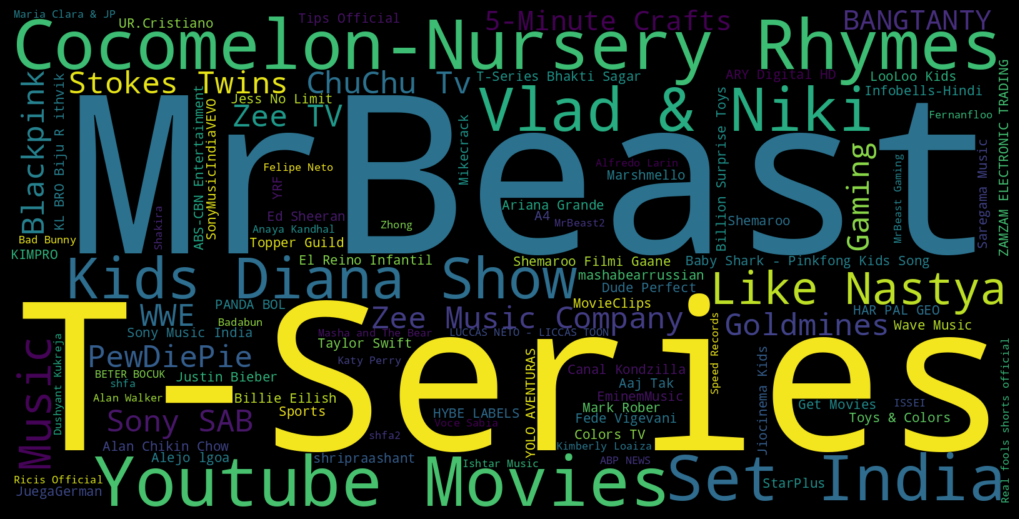

In [13]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
import pandas as pd

# Assuming `dataset` is your DataFrame and `stop_words_list` is a list of stopwords

# Example stopwords list, modify as needed
stop_words_list = set(STOPWORDS)

# Generate frequency counts from the 'business_category' column
counts = Counter(df["Username"].dropna().apply(lambda x: str(x)))

# Generate the word cloud
wcc = WordCloud(
    background_color="black",
    width=1600, height=800,
    max_words=2000,
    stopwords=stop_words_list
)
wcc.generate_from_frequencies(counts)

# Display the word cloud
plt.figure(figsize=(10, 5), facecolor='k')
plt.imshow(wcc, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


In [14]:
from sklearn.model_selection import train_test_split

# Features and Target
X = df.drop(columns=['Ranking', 'Username'])  # Exclude Ranking (target) and Username (identifier)
y = df['Ranking']  # Target variable

# Split the Data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (80, 4)
Testing set size: (21, 4)
